Load Python modules
===

In [1]:
import numpy as np
import scipy
from scipy import constants
import mpmath

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Mathmatics calculation
from sympy import pi
from sympy import Symbol, symbols
from sympy import sqrt, sin, cos
from sympy import Matrix, transpose
from sympy import solve, simplify
from sympy.plotting import plot, plot3d
from sympy import init_printing

init_printing()

Functions
===

In [2]:
def Est_Atom_dist(T, mu_local, U, Nmax=10):
  ## Calcuration maximum occupancy
  beta_val = 1 / (constants.k * T_val)

  Pr = np.zeros([mu_local.size, Nmax])
  Nreal = np.zeros([mu_local.size, Nmax])
  Ndet = np.zeros([mu_local.size, Nmax])
  
  Z = np.zeros(mu_local.shape) # Grand canonical partition function
  
  for N in range(Nmax):
    En = N * (N - 1) * U_val / 2
    
    Pr[:, N] = np.exp((mu_local * N - En) * beta_val)
    Nreal[:, N] = N * Pr[:, N]
    Ndet[:, N] = np.mod(N, 2) * Pr[:, N]
    
    Z += Pr[:, N]
    
  for N in range(Nmax):
    Pr[:, N] /= Z
    Nreal[:, N] /= Z
    Ndet[:, N] /= Z
  
  Nreal = np.sum(Nreal, 1)
  Ndet = np.sum(Ndet, 1)
  Ndet = (Ndet - np.min(Ndet)) / (np.max(Ndet) - np.min(Ndet))

  Ntotal = np.sum(Nreal)

  Sloc = np.zeros(Nreal.shape)
  
  for N in range(Nmax):
    Prn = Pr[:, N]
    Sloc[Prn>0] += - Prn[Prn>0] * np.log(Prn[Prn>0])

  return Nreal, Ndet, Ntotal, Pr, Sloc

## Set parameters

### Default plot settings

In [3]:
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['ytick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['axes.linewidth'] = 1.5 # edge linewidth
plt.rcParams['xtick.major.size'] = 8 # major tick size in points
plt.rcParams['xtick.major.width'] = 1.5 # major tick width in points
plt.rcParams['xtick.top'] = True # draw ticks on the top side
plt.rcParams['ytick.major.size'] = 8 # major tick size in points
plt.rcParams['ytick.major.width'] = 1.5 # major tick width in points
plt.rcParams['ytick.right'] = True # draw ticks on the right side

### Symbols for sympy calculation

In [4]:
x, y, z = symbols('x y z', real=True)

# Cartesian coordinates
r = Matrix([x, y, z])

# Wavenumber of horizontal and vertical lattice beam
k = Symbol("k", positive=True)

---
## Triangular lattice
Wavenumbers of horizontal lattice $\boldsymbol{k}_i$ are defined by
\begin{eqnarray*}
\boldsymbol{k} = 
\begin{pmatrix}
\boldsymbol{k}_1 & \boldsymbol{k}_2 & \boldsymbol{k}_3 \\
\end{pmatrix}
= k \times \begin{pmatrix}
1 & \cos\theta & \cos\theta \\
0 & \sin\theta & -\sin\theta \\
0 & 0 & 0 \\
\end{pmatrix},
\end{eqnarray*}
where wavenumber $k = 2\pi / \lambda$ and $\theta$ is relative angle between lattice beams.

Reciprocal lattice vectors $\boldsymbol{b}_i$ are defined by
\begin{eqnarray}
\boldsymbol{b}_1
= 2\pi \dfrac{\boldsymbol{a}_2 \times \boldsymbol{a}_3}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)},
\boldsymbol{b}_2
= 2\pi \dfrac{\boldsymbol{a}_3 \times \boldsymbol{a}_1}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)},
\boldsymbol{b}_3
= 2\pi \dfrac{\boldsymbol{a}_1 \times \boldsymbol{a}_2}{\boldsymbol{a}_1 \cdot (\boldsymbol{a}_2 \times \boldsymbol{a}_3)}.
\end{eqnarray}

Notably, the reciprocal lattice vectors $\boldsymbol{b}_i$ satisfy the following relation;
\begin{eqnarray}
\boldsymbol{b}_i \cdot \boldsymbol{a}_j = 2\pi \delta_{ij},
\end{eqnarray}
where $\delta_{ij}$ is the Kronecker delta symbol.

Reference)

[キッテル 固体物理学入門 第8版](https://www.amazon.co.jp/%E3%82%AD%E3%83%83%E3%83%86%E3%83%AB-%E5%9B%BA%E4%BD%93%E7%89%A9%E7%90%86%E5%AD%A6%E5%85%A5%E9%96%80-%E7%AC%AC8%E7%89%88-%E3%83%8F%E3%83%BC%E3%83%88%E3%82%AB%E3%83%90%E3%83%BC%E7%89%88-%E3%83%81%E3%83%A3%E3%83%BC%E3%83%AB%E3%82%BA/dp/4621076566)

[Ashcroft/Mermin, Solid state physics](https://www.amazon.co.jp/Solid-State-Physics-Neil-Ashcroft/dp/0030839939)

### Sites

In [5]:
N = 75

R_lim = 15
x_lim = 15
y_lim = 15

limit_range = 'square' # 'square' or 'circle'

In [6]:
theta0 = Symbol(r'\theta_0', real=True)
theta = Symbol(r'\theta', real=True)
dthetas = symbols(r'\varDelta\theta_1 \varDelta\theta_2', real=True)

# Lattice wavevector: ks
ks = transpose(k * Matrix([[cos(theta0), sin(theta0), 0], [cos(theta0 + theta + dthetas[0]), sin(theta0 + theta + dthetas[0]), 0], [cos(theta0 - theta + dthetas[1]), sin(theta0 - theta + dthetas[1]), 0]]))

# ks = ks.subs({theta0: pi/3, theta: 2*pi/3, dthetas[0]: 0, dthetas[1]: 0})
ks = ks.subs({theta0: pi/2 + 9.2*np.pi/180, theta: 2*pi/3, dthetas[0]: 0, dthetas[1]: 0})

# Reciprocal lattice vector
G = [simplify(ks[0:3:1, n+1] - ks[0:3:1, n]) for n in range(2)]

a = [0, 0, 0, 0]

a = symbols('a_x^1 a_y^1 a_x^2 a_y^2', real=True)
az = Symbol('a_z', real=True)
a1 = Matrix([a[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([a[i+2] if i<2 else 0 for i in range(3)])
a3 = Matrix([0, 0, az])

eq1 = (transpose(G[0]) * a1)[0] - 2 * pi
eq2 = (transpose(G[1]) * a1)[0]
eq3 = (transpose(G[0]) * a2)[0]
eq4 = (transpose(G[1]) * a2)[0] - 2 * pi

tmp = solve([eq1, eq2, eq3, eq4], a)

b = [0, 0, 0, 0]
for n, v in enumerate(tmp.values()):
    b[n] = v
a1 = Matrix([b[i] if i<2 else 0 for i in range(3)])
a2 = Matrix([b[i+2] if i<2 else 0 for i in range(3)])

In [7]:
nm = [[i - (N-1)/2, j - (N-1)/2] for i in range(N) for j in range(N)]
x_ol = Matrix([a1[0] * nm[i][0] + a2[0] * nm[i][1] for i in range(N*N)])
y_ol = Matrix([a1[1] * nm[i][0] + a2[1] * nm[i][1] for i in range(N*N)])

xs_tmp = np.array([v for v in x_ol.subs(k, 2 * pi/(1.064 * 1e-6))], dtype=np.float)
ys_tmp = np.array([v for v in y_ol.subs(k, 2 * pi/(1.064 * 1e-6))], dtype=np.float)

if limit_range == 'square':
  ROI = (np.abs(xs_tmp) <= x_lim*1e-6) * (np.abs(ys_tmp) <= y_lim*1e-6)
  xs = xs_tmp[ROI]
  ys = ys_tmp[ROI]
elif limit_range == 'circle':
  xs = xs_tmp[xs_tmp**2 + ys_tmp**2 < (R_lim*1e-6)**2]
  ys = ys_tmp[xs_tmp**2 + ys_tmp**2 < (R_lim*1e-6)**2]
else:
  xs = xs_tmp
  ys = ys_tmp

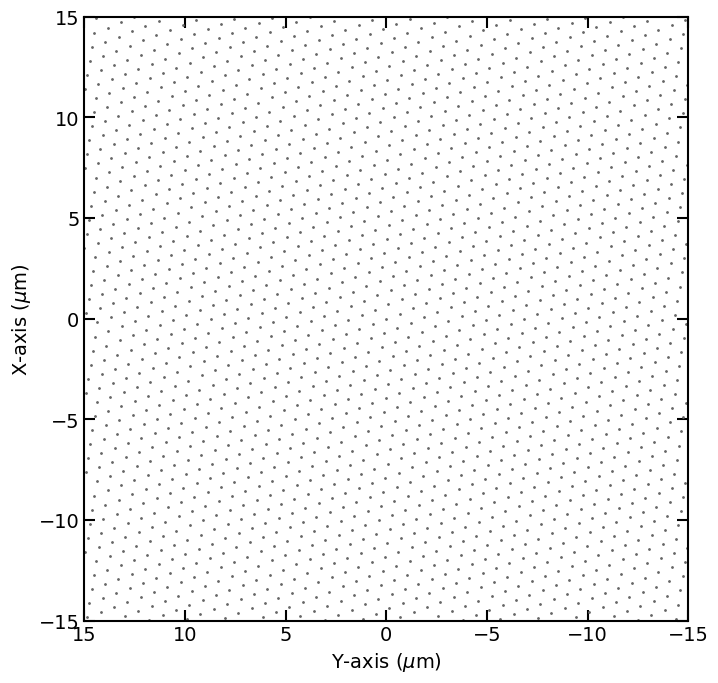

In [8]:
fig = plt.figure(dpi=100, figsize=(8, 8))

plt.plot(xs*1e6, ys*1e6, '.', c='#666666', ms=2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Y-axis ($\mu$m)')
plt.ylabel('X-axis ($\mu$m)')

if limit_range == 'square':
  plt.xlim([x_lim, -x_lim])
  plt.ylim([-y_lim, y_lim])
elif limit_range == 'circle':
  plt.xlim([R_lim, -R_lim])
  plt.ylim([-R_lim, R_lim])
else:
  plt.xlim([5, -5])
  plt.ylim([-5, 5])

plt.show()

### Parameters
- $T$: temperature of atoms
- $\mu$: chemical potential
- $\omega_x$: external trap frequency along x-axis
- $\omega_y$: external trap frequency along y-axis
- $U$: Onsite interaction
- omega_x(y)_val = $\omega_i/2\pi$ (Hz)


In [9]:
#@title  { run: "auto", display-mode: "form" }
mass_Rb_val = 86.909180520 * constants.m_u; # kg

omega_x_val = 40.73 #@param {type:"number"}
omega_y_val = 75.15 #@param {type:"number"}

omega_x_val *= 2 * np.pi
omega_y_val *= 2 * np.pi

In [10]:
#@title  { run: "auto", display-mode: "form" }
U_val = 325.137 #@param {type:"number"}
J_val = 3.24911 #@param {type:"number"}
T_val = 3 #@param {type:"number"}
mu_val = 20 #@param {type:"number"}

U_val *= constants.h
J_val *= constants.h
T_val *= 1e-9
mu_val *= 1e-9 * constants.k

In [11]:
# Case = 1

# if Case is 0: # N=1 Mott shell
#     mu_val = 0.75 * U_val # J
#     T_val = 2e-9
# elif Case is 1: # N=1-2 Mott shell
#     mu_val = 1.25 * U_val # J
#     T_val = 2e-9 # K
# elif Case is 2: # N=1-3 Mott shell
#     mu_val = 2.3 * U_val # J
#     T_val = 2e-9 # K
# elif Case is 3: # N=1-2 Mott shell with High-temperature
#     mu_val = 1.5 * U_val # J
#     T_val = 5e-9 # K
# else:
#     mu_val = 0.7* 2.17 * U_val # J
#     T_val = 0.5 * 0.074 * U_val / constants.k # K

print('U/J = %.1f, U/6J = %.1f' % (U_val/J_val, U_val/(6*J_val)))
print('kB T/J = %.1f, kB T/U = %.3f' % (constants.k * T_val/J_val, constants.k * T_val/U_val))
print('Atom temperature in optical lattices T = %.3f nK' % (T_val * 1e9))

U/J = 100.1, U/6J = 16.7
kB T/J = 19.2, kB T/U = 0.192
Atom temperature in optical lattices T = 3.000 nK


### Calculation: local chemical potential

In [12]:
mu_local = mu_val - mass_Rb_val * (omega_x_val**2 * xs**2 + omega_y_val**2 * ys**2) / 2

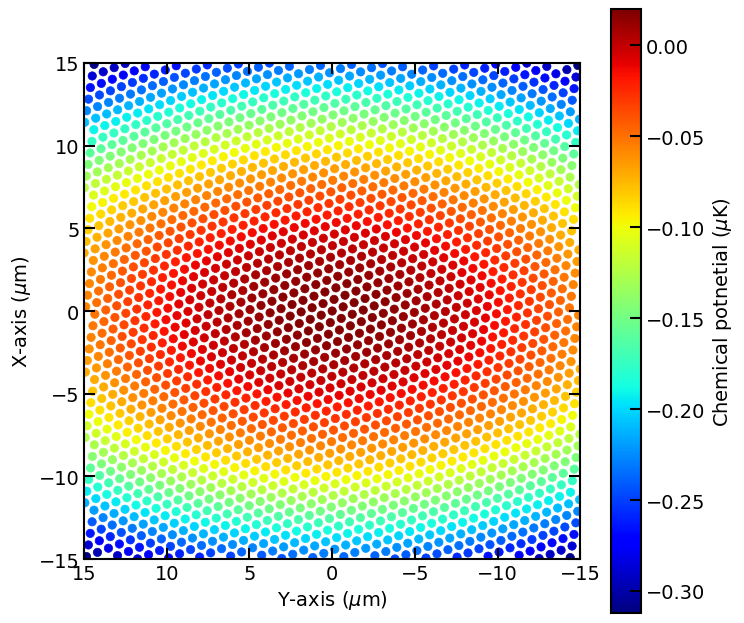

In [13]:
fig = plt.figure(dpi=100, figsize=(8, 8))
g = plt.subplot()

plt1 = g.scatter(xs*1e6, ys*1e6, c=mu_local/constants.k*1e6, cmap='jet', lw=0.5)

bar = plt.colorbar(plt1)
bar.set_label('Chemical potnetial ($\mu$K)')

g.set_xlim(np.max(xs*1e6), np.min(xs*1e6))
g.set_ylim(np.min(ys*1e6), np.max(ys*1e6))
g.set_xlabel('Y-axis ($\mu$m)')
g.set_ylabel('X-axis ($\mu$m)')

g.set_aspect('equal')

plt.show()

### Calculation: Atom distribution

In [14]:
Nreal, Ndet, Ntotal, Pr, Sloc = Est_Atom_dist(T_val, mu_local, U_val)

S_total = np.sum(Sloc)
T_Tc_val = float(((np.sum(Sloc) / Ntotal) * mpmath.zeta(3) / (4 * mpmath.zeta(4)))**(1/3)) # T/Tc?

print(Ntotal)

286.2856596937115


### Plot: Entropy distribution

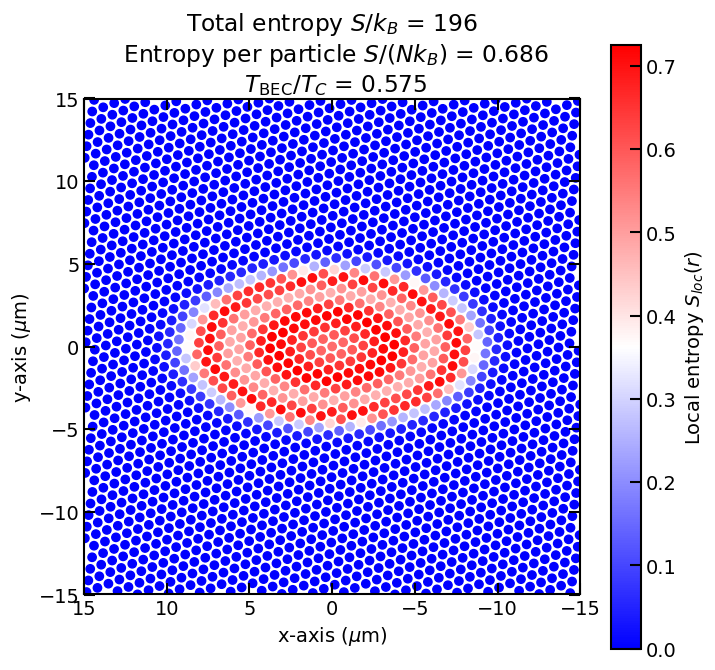

In [15]:
fig = plt.figure(dpi=100, figsize=(8, 8))
g = plt.subplot()

plt1 = g.scatter(xs*1e6, ys*1e6, c=Sloc, cmap='bwr', vmin=0)

bar = plt.colorbar(plt1)
bar.set_label(r'Local entropy $S_{loc}(r)$')

g.set_title('Total entropy $S/k_B$ = %d\n Entropy per particle $S/(N k_B)$ = %.3f\n $T_\mathrm{BEC}/T_C$ = %.3f' % (S_total, S_total / Ntotal, T_Tc_val))
g.set_xlim(np.max(xs*1e6), np.min(xs*1e6))
g.set_ylim(np.min(ys*1e6), np.max(ys*1e6))
g.set_xlabel('x-axis ($\mu$m)')
g.set_ylabel('y-axis ($\mu$m)')

g.set_aspect('equal')

plt.show()

### Plot: atom distribution

#### Real distribution

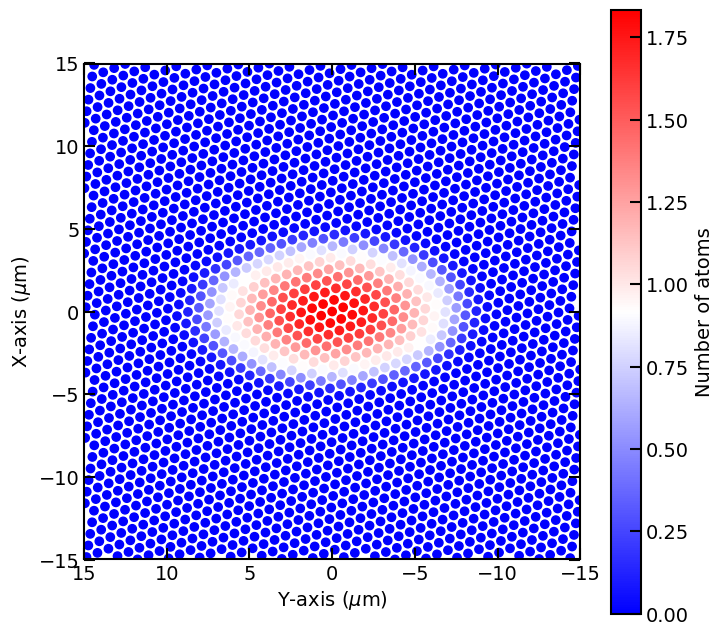

In [16]:
fig = plt.figure(dpi=100, figsize=(8, 8))
g = plt.subplot()

plt1 = g.scatter(xs*1e6, ys*1e6, c=Nreal, cmap='bwr')

bar = plt.colorbar(plt1)
bar.set_label('Number of atoms')

g.set_xlim(np.max(xs*1e6), np.min(xs*1e6))
g.set_ylim(np.min(ys*1e6), np.max(ys*1e6))
g.set_xlabel('Y-axis ($\mu$m)')
g.set_ylabel('X-axis ($\mu$m)')

g.set_aspect('equal')

plt.show()

#### Parity measurement

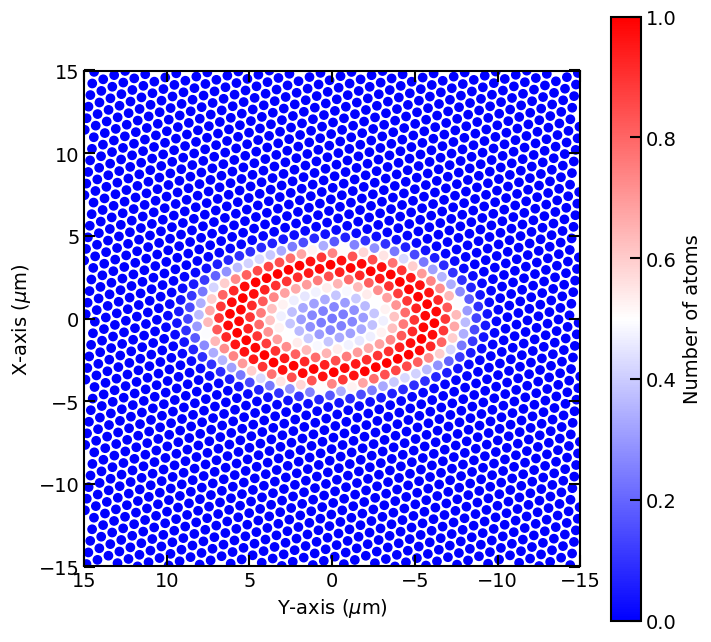

In [17]:
fig = plt.figure(dpi=100, figsize=(8, 8))
g = plt.subplot()

plt1 = g.scatter(xs*1e6, ys*1e6, c=Ndet, cmap='bwr', vmin=0)

bar = plt.colorbar(plt1)
bar.set_label('Number of atoms')

g.set_xlim(np.max(xs*1e6), np.min(xs*1e6))
g.set_ylim(np.min(ys*1e6), np.max(ys*1e6))
g.set_xlabel('Y-axis ($\mu$m)')
g.set_ylabel('X-axis ($\mu$m)')

g.set_aspect('equal')

plt.show()